# CEE 690-02

# Environmental Spatial Data Analysis

# Lecture 20

# Logistics

* Pushed the due date of HW#7 to Thursday, 11/14.
* HW#8 will be due on 11/26 (that can't be pushed back). 
* Let me provide some context for the second problem in the homework...

# Outline

* Vector data (finally)
* Introduce R/Rpy2
* Intro to Geostatistics: Motivation

# Vector data

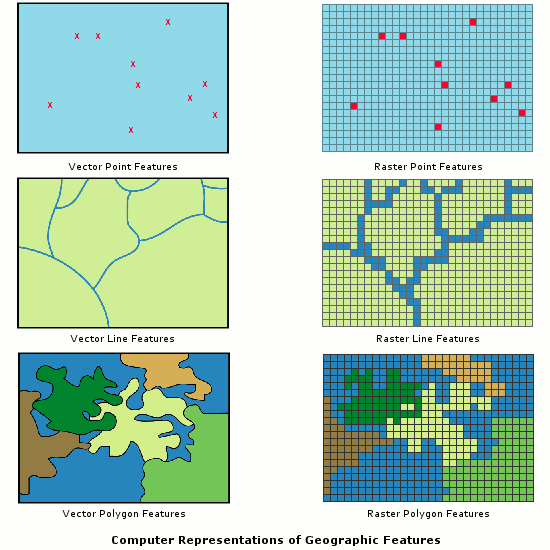

* Shapefiles and geodatabases are vector databases
* For each polygon, there are a set of attributes/properties
* Not as easy as regular grid datasets. However, they do have their place.

# Vector file formats

In [405]:
%%HTML
<iframe src='https://gdal.org/drivers/vector/index.html', width=700, height=600></iframe>

# Vector data example: HydroLakes

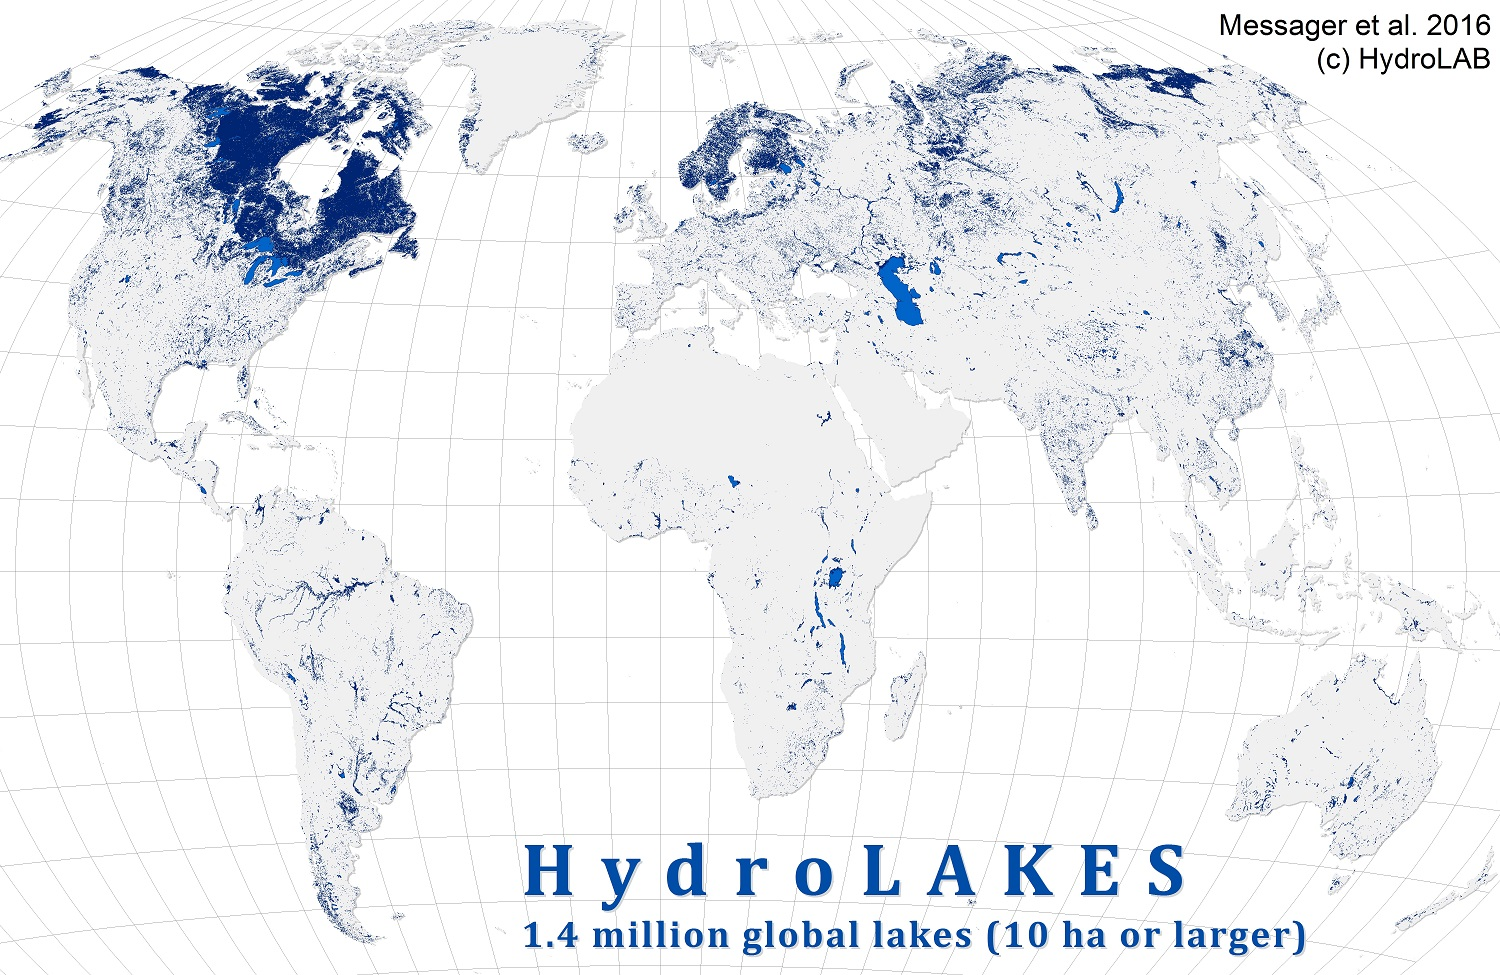

The data is saved as polygons not a regular grid. You can then save/access attributes per polygon.

# There is more to GDAL than you thought...

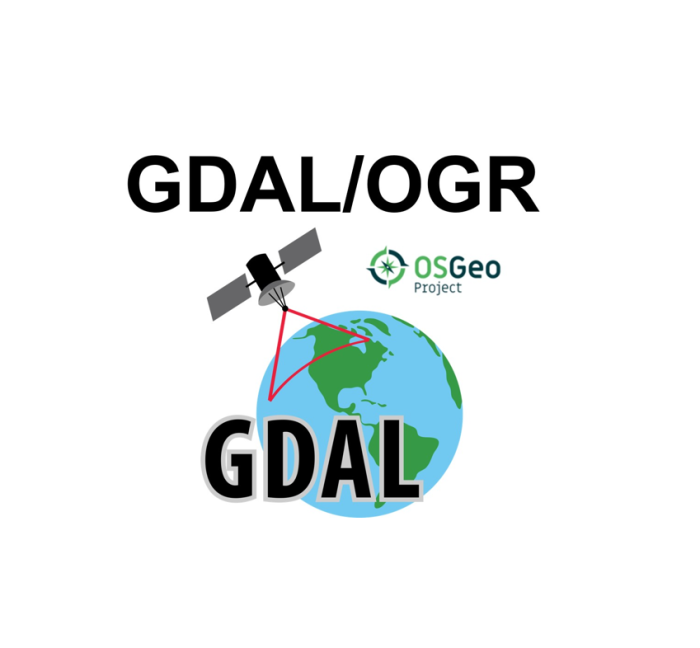

# ogrinfo

General information about a vector database

In [406]:
%%HTML
<iframe src='https://gdal.org/programs/ogrinfo.html', width=700, height=600></iframe>

In [171]:
%%bash
ogrinfo -so /data/HydroLakes/HydroLAKES_polys_v10.gdb HydroLAKES_polys_v10

INFO: Open of `/data/HydroLakes/HydroLAKES_polys_v10.gdb'
      using driver `OpenFileGDB' successful.

Layer name: HydroLAKES_polys_v10
Geometry: Multi Polygon
Feature Count: 1427688
Extent: (-180.000000, -55.865139) - (180.000000, 83.575951)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
FID Column = OBJECTID
Geometry Column = Shape
Hylak_id: Integer (0.0)
Lake_name: String (40.0)
Country: String (35.0)
Continent: String (15.0)
Poly_src: String (10.0)
Lake_type: Integer(Int16) (0.0)
Grand_id: Integer(Int16) (0.0)
Lake_area: Real(Float32) (0.0)
Shore_len: Real(Float32) (0.0)
Shore_dev: Real(Float32) (0.0)
Vol_total: Real(Float32) (0.0)
Vol_res: Real(Float32) (0.0)
Vol_src: Integer(Int16) (0.0)
De

# OGR formats

In [407]:
%%HTML
<iframe src='https://gdal.org/drivers/vector/index.html', width=700, height=600></iframe>

# Let's look at lakes in northern Wisconsin

In [190]:
%%bash 
ogrinfo -spat -89.5 45.5 -89.0 46.0 /data/HydroLakes/HydroLAKES_polys_v10.gdb HydroLAKES_polys_v10

INFO: Open of `/data/HydroLakes/HydroLAKES_polys_v10.gdb'
      using driver `OpenFileGDB' successful.

Layer name: HydroLAKES_polys_v10
Geometry: Multi Polygon
Feature Count: 187
Extent: (-180.000000, -55.865139) - (180.000000, 83.575951)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
FID Column = OBJECTID
Geometry Column = Shape
Hylak_id: Integer (0.0)
Lake_name: String (40.0)
Country: String (35.0)
Continent: String (15.0)
Poly_src: String (10.0)
Lake_type: Integer(Int16) (0.0)
Grand_id: Integer(Int16) (0.0)
Lake_area: Real(Float32) (0.0)
Shore_len: Real(Float32) (0.0)
Shore_dev: Real(Float32) (0.0)
Vol_total: Real(Float32) (0.0)
Vol_res: Real(Float32) (0.0)
Vol_src: Integer(Int16) (0.0)
Depth_

# ogr2ogr

Alter an existing vector database (e.g., subset or reproject) 

In [408]:
%%HTML
<iframe src='https://gdal.org/programs/ogr2ogr.html', width=700, height=600></iframe>

# Let's create a new shapefile with the data around Durham

In [191]:
%%bash 
ogr2ogr -spat -89.5 45.5 -89.0 46.0 ../Workspace/HydroLakes_Northern_Wisconsin.shp /data/HydroLakes/HydroLAKES_polys_v10.gdb

Warning 6: Normalized/laundered field name: 'Shape_Length' to 'Shape_Leng'


# gdal_rasterize

Rasterize a vector database

In [409]:
%%HTML
<iframe src='https://gdal.org/programs/gdal_rasterize.html', width=700, height=600></iframe>

# Let's rasterize the polygons

* We will set each rasterized polygon to the lake id value

In [192]:
%%bash 
ogrinfo -so ../Workspace/HydroLakes_Northern_Wisconsin.shp HydroLakes_Northern_Wisconsin

INFO: Open of `../Workspace/HydroLakes_Northern_Wisconsin.shp'
      using driver `ESRI Shapefile' successful.

Layer name: HydroLakes_Northern_Wisconsin
Metadata:
  DBF_DATE_LAST_UPDATE=2019-11-07
Geometry: Polygon
Feature Count: 187
Extent: (-89.572911, 45.486846) - (-88.967642, 46.017535)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
Hylak_id: Integer (9.0)
Lake_name: String (40.0)
Country: String (35.0)
Continent: String (15.0)
Poly_src: String (10.0)
Lake_type: Integer (9.0)
Grand_id: Integer (9.0)
Lake_area: Real (24.15)
Shore_len: Real (24.15)
Shore_dev: Real (24.15)
Vol_total: Real (24.15)
Vol_res: Real (24.15)
Vol_src: Integer (9.0)
Depth_avg: Real (24.15)
Dis_avg: Real (24.15)
Res_time:

In [194]:
%%bash 
gdal_rasterize -l HydroLakes_Northern_Wisconsin -a Hylak_id -tr 0.001 0.001 \
../Workspace/HydroLakes_Northern_Wisconsin.shp ../Workspace/HydroLakes_Northern_Wisconsin_Hylak_id.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


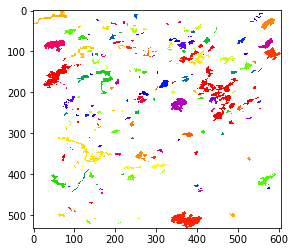

In [206]:
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio
data = rasterio.open('../Workspace/HydroLakes_Northern_Wisconsin_Hylak_id.tif').read(1)
#Reorder from 1 to nlakes
ulakes = np.unique(data)[1:]
for ilake in range(ulakes.size):
    data[data == ulakes[ilake]] = ilake+1
#Mask out non-lake area
data = np.ma.masked_array(data,data==0)
plt.imshow(data,cmap='prism')
plt.show()

# gdal_polygonize

Polygonize a raster

In [410]:
%%HTML
<iframe src='https://gdal.org/programs/gdal_polygonize.html', width=700, height=600></iframe>

# Let's polygonize our raster data again

In [213]:
%%bash 
rm ../Workspace/HydroLakes_Northern_Wisconsin_Hylak_id_Reproduced*
gdal_polygonize.py -8 ../Workspace/HydroLakes_Northern_Wisconsin_Hylak_id.tif ../Workspace/HydroLakes_Northern_Wisconsin_Hylak_id_Reproduced.shp

0...10...20...30...40...50...60...70...80...90...Creating output ../Workspace/HydroLakes_Northern_Wisconsin_Hylak_id_Reproduced.shp of format ESRI Shapefile.
100 - done.


In [214]:
%%bash 
ogrinfo -so ../Workspace/HydroLakes_Northern_Wisconsin_Hylak_id_Reproduced.shp HydroLakes_Northern_Wisconsin_Hylak_id_Reproduced

INFO: Open of `../Workspace/HydroLakes_Northern_Wisconsin_Hylak_id_Reproduced.shp'
      using driver `ESRI Shapefile' successful.

Layer name: HydroLakes_Northern_Wisconsin_Hylak_id_Reproduced
Metadata:
  DBF_DATE_LAST_UPDATE=2019-11-07
Geometry: Polygon
Feature Count: 210
Extent: (-89.573411, 45.486035) - (-88.967411, 46.018035)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
DN: Integer (9.0)


# Vector data in Python

There are many ways, we will look at using fiona + shapely

# Fiona focuses on read/write vector data

In [232]:
import fiona

#Open access to the file
fp = fiona.open('../Workspace/HydroLakes_Northern_Wisconsin.shp', 'r')

#Extract all the data to a list
data = list(fp)

#Iterate through the properties of first feature/polygon
for key in data[0]['properties'].keys():
    print('%s:' % key, data[0]['properties'][key])

#Close access to file
fp.close()

Hylak_id: 8772
Lake_name: None
Country: United States of America
Continent: North America
Poly_src: SWBD
Lake_type: 1
Grand_id: 0
Lake_area: 21.8700008392334
Shore_len: 94.04000091552734
Shore_dev: 5.670000076293945
Vol_total: 182.9600067138672
Vol_res: 0.0
Vol_src: 3
Depth_avg: 8.399999618530273
Dis_avg: 3.505000114440918
Res_time: 604.2000122070312
Elevation: 493
Slope_100: 2.599999904632568
Wshd_area: 305.79998779296875
Pour_long: -89.144019
Pour_lat: 45.880018
Shape_Leng: 1.0228431757215
Shape_Area: 0.00253817031928


# Shapely focuses on creating/manipulating vector geometries

In [236]:
import shapely.geometry

#Create a polygon
polygon = shapely.geometry.Polygon([(0, 0), (1, 1), (1, 0)])

#Print the area of the polygon
print(polygon.area)

#Print the length of the polygon
print(polygon.length)

#Compute the bounding box
print(polygon.bounds)

0.5
3.414213562373095
(0.0, 0.0, 1.0, 1.0)


You can create points, lines, rings, polygons...

# Fiona + Shapely

In [240]:
#Look at the geometry data that was read in
data[0]['geometry']

{'type': 'Polygon',
 'coordinates': [[(-89.13428683810767, 45.86992749638085),
   (-89.13264268663198, 45.86884947988784),
   (-89.1343929036459, 45.86755200809961),
   (-89.13879177517364, 45.868764301936324),
   (-89.14046413845486, 45.8697812832732),
   (-89.14361355251737, 45.8697509013287),
   (-89.14318250868058, 45.868914041519645),
   (-89.14143039279514, 45.8683454651308),
   (-89.14024739583337, 45.866749599245395),
   (-89.14096950954865, 45.865207444297425),
   (-89.13983127170141, 45.864209451676004),
   (-89.13847764756946, 45.864906608793945),
   (-89.13671739366328, 45.86533602502658),
   (-89.13438503689247, 45.86534172164119),
   (-89.13282063802092, 45.864940788481476),
   (-89.1332085503472, 45.86418747901962),
   (-89.13495958116323, 45.86331833839466),
   (-89.13697347005208, 45.86088398509622),
   (-89.13765679253476, 45.85915140046063),
   (-89.13901123046875, 45.85785013092942),
   (-89.13963840060765, 45.85689337094692),
   (-89.1410500759549, 45.8555373054085

In [243]:
#We can convert that data into a shapely polygon
geom = shapely.geometry.shape(data[0]['geometry'])
print(geom)

POLYGON ((-89.13428683810767 45.86992749638085, -89.13264268663198 45.86884947988784, -89.1343929036459 45.86755200809961, -89.13879177517364 45.86876430193632, -89.14046413845486 45.8697812832732, -89.14361355251737 45.8697509013287, -89.14318250868058 45.86891404151964, -89.14143039279514 45.8683454651308, -89.14024739583337 45.8667495992454, -89.14096950954865 45.86520744429743, -89.13983127170141 45.864209451676, -89.13847764756946 45.86490660879394, -89.13671739366328 45.86533602502658, -89.13438503689247 45.86534172164119, -89.13282063802092 45.86494078848148, -89.13320855034721 45.86418747901962, -89.13495958116323 45.86331833839466, -89.13697347005208 45.86088398509622, -89.13765679253476 45.85915140046063, -89.13901123046875 45.85785013092942, -89.13963840060765 45.85689337094692, -89.14105007595489 45.85553730540857, -89.14304850260419 45.85456779585996, -89.14346950954868 45.85198180410652, -89.14680826822919 45.8497650072315, -89.14763617621529 45.84889912181484, -89.146796

In [246]:
#Compute some statistics
print(geom.centroid)

#Compute area
print(geom.area)

POINT (-89.12432520028005 45.81627748018127)
0.0025381703192803792


That's not very interesting, since our area is in arcdegree. We need to reproject our polygon first.

In [281]:
import pyproj
import shapely.ops
from functools import partial

#Define the transformation to apply for each point in the geometry
project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'), #plate carree
    pyproj.Proj(init='epsg:5070')) #conus albers equal area

#Transform the points
geom2 = shapely.ops.transform(project,geom)

#Let's compute the statistics again and compare them to what was already in the database

#Compute area
print('Computed area: %f (km2)' % (geom2.area/10**6))
print('Database area: %f (km2)' % data[0]['properties']['Lake_area'])

#Compute length
print('Computed length: %f (km)' % (geom2.length/10**3))
print('Database length: %f (km)' % data[0]['properties']['Shore_len'])

Computed area: 21.925531 (km2)
Database area: 21.870001 (km2)
Computed length: 94.029750 (km)
Database length: 94.040001 (km)


Not exactly the same but you get the point...

# We could have spent the entire course on vector data

But it is not the purpose of this course (nor is it my strength).

Further interest?

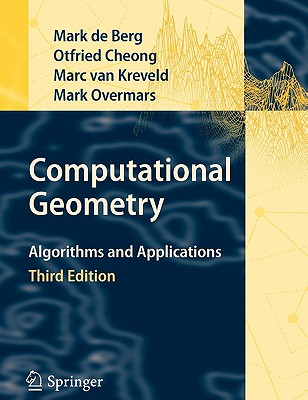

# Plotting georeferenced vector data

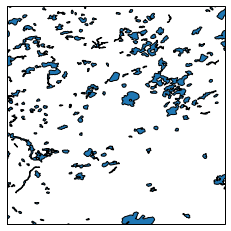

In [289]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader
import cartopy.feature

#Read in and plot the polygons for the lakes
fname = '../Workspace/HydroLakes_Northern_Wisconsin.shp'
img_extent = ()
ax = plt.axes(projection=ccrs.PlateCarree())
shape_feature = cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader(fname).geometries(),
                                ccrs.PlateCarree(), edgecolor='black')
ax.add_feature(shape_feature)
ax.set_extent([-89.5,-89.0,45.5,46.0], ccrs.PlateCarree())
plt.show()

# If you want to get fancier you can superimpose the polygons on other data (e.g., elevation)

In [290]:
%%bash 
gdalwarp -overwrite -te -89.5 45.5 -89.0 46.0 -t_srs EPSG:4326 /data/NED/NED.vrt ../Workspace/dem_northern_wisconsin.tif

Creating output file that is 1800P x 1800L.
Processing /data/NED/NED.vrt [1/1] : 0Using internal nodata values (e.g. -99999) for image /data/NED/NED.vrt.
Copying nodata values from source /data/NED/NED.vrt to destination ../Workspace/dem_northern_wisconsin.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


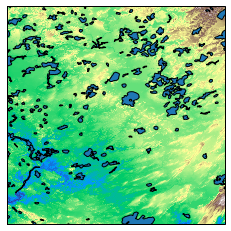

In [292]:
#Make the combinedplot
dem = rasterio.open('../Workspace/dem_northern_wisconsin.tif').read(1)
lakes = cartopy.io.shapereader.Reader('../Workspace/HydroLakes_Northern_Wisconsin.shp').geometries()
img_extent = [-89.5,-89.0,45.5,46.0]
ax = plt.axes(projection=ccrs.PlateCarree())
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
ax.add_feature(cartopy.feature.ShapelyFeature(lakes,ccrs.PlateCarree(), edgecolor='black'))
#ax.set_extent([-89.5,-89.0,45.5,46.0], ccrs.PlateCarree())
plt.show()

That is all that we will cover on vector data for this course.

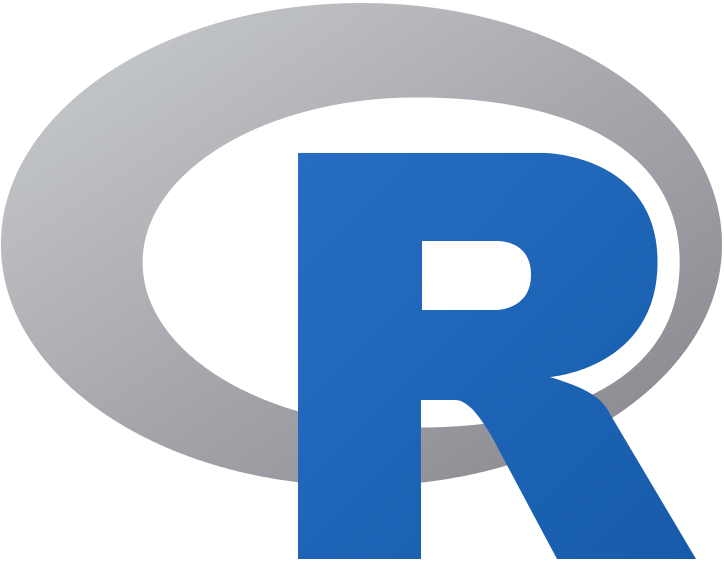

# Get R running in the background

In [294]:
%reload_ext rpy2.ipython

# Then use R from within the notebook

In [295]:
%%R
print('hello,world')

[1] "hello,world"


In [296]:
%%R
# Create the data frame.
city.data <- data.frame(
   annual_t2m = c(15,9.8,10.01), 
   annual_prcp = c(1221,843,394),
   name = c("Durham","Chicago","Denver")
)

In [297]:
%%R
print(city.data)

  annual_t2m annual_prcp    name
1      15.00        1221  Durham
2       9.80         843 Chicago
3      10.01         394  Denver


# Passing information to and from R

In [415]:
import numpy as np
A = np.arange(10)
B = np.ones(10)

## Python to R

In [416]:
%%R -i A,B
print(A)
print(B)


 [1] 0 1 2 3 4 5 6 7 8 9
 [1] 1 1 1 1 1 1 1 1 1 1


## R to Python

In [300]:
%%R -o C
C <- A + B

In [301]:
C = np.array(C)
print(C)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


## Pandas and R

In [302]:
import pandas
d = {'taxonomic_order': [1, 2], 'lat': [35.2,36.1],'lon':[-102.2,-101.0]}
df = pandas.DataFrame(data=d)

In [303]:
%%R -i df
print(df)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


  taxonomic_order  lat    lon
0               1 35.2 -102.2
1               2 36.1 -101.0


# Let's show how we will use this for our Geostatistics module

Don't worry about understanding what is happening under the hood right now. Just focus on what we are trying to do and what Geostatistics will allow us to do.

In [304]:
%%bash 
#Extract region
gdalwarp -r average -overwrite -te -89.8 40.3 -89.5 40.6 /data/POLARIS/sand_0_5.vrt ../Workspace/tmp.tif
#Reproject
gdalwarp -r average -overwrite -tr 250 250 -t_srs '+proj=aea +lat_1=40.0 +lat_2=41.0 +lat_0=40.5 +lon_0=-90 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs' ../Workspace/tmp.tif ../Workspace/sand_0_5.tif

Creating output file that is 1080P x 1080L.
Processing /data/POLARIS/sand_0_5.vrt [1/1] : 0Using internal nodata values (e.g. -9999) for image /data/POLARIS/sand_0_5.vrt.
Copying nodata values from source /data/POLARIS/sand_0_5.vrt to destination ../Workspace/tmp.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 102P x 134L.
Processing ../Workspace/tmp.tif [1/1] : 0Using internal nodata values (e.g. -9999) for image ../Workspace/tmp.tif.
Copying nodata values from source ../Workspace/tmp.tif to destination ../Workspace/sand_0_5.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


In [305]:
import xarray as xr
fp = xr.open_rasterio('../Workspace/sand_0_5.tif')
data = np.array(fp[0,:,:])
y = np.array(fp['y'][:])
x = np.array(fp['x'][:])
fp.close()

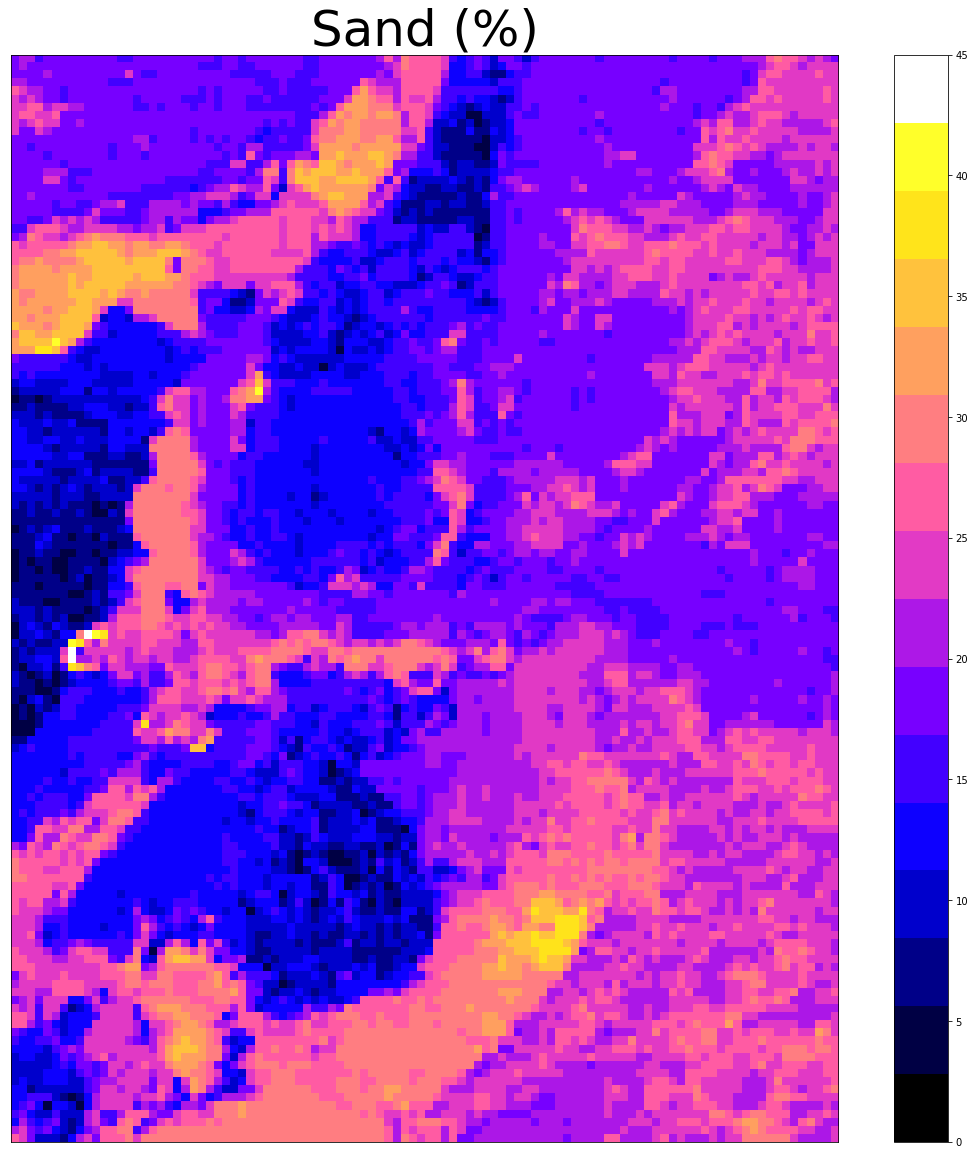

In [382]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
data = np.ma.masked_array(data,data<0)
#vmin = np.mean(data) - np.std(data)
#vmax = np.mean(data) + np.std(data)
vmin = 0
vmax = 45
plt.figure(figsize=(20,20))
plt.imshow(data,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Sand (%)',fontsize=50)
plt.colorbar()
plt.show()

# What if we didn't have the entire map?

In [325]:
#Let's randomly sample n different points
nsamples = 2000
#Randomly sample n points on the domain
np.random.seed(1)
(xs,ys) = np.meshgrid(np.arange(x.size),np.arange(y.size))
ipoints = np.random.choice(np.arange(x.size*y.size),nsamples,replace=False)
ix = xs.ravel()[ipoints]
iy = ys.ravel()[ipoints]
#Extract the points
y_points = y[iy]
x_points = x[ix]
#Extract the data
data_points = []
for i in range(iy.size):
    data_points.append(data[iy[i],ix[i]])
data_points = np.array(data_points)

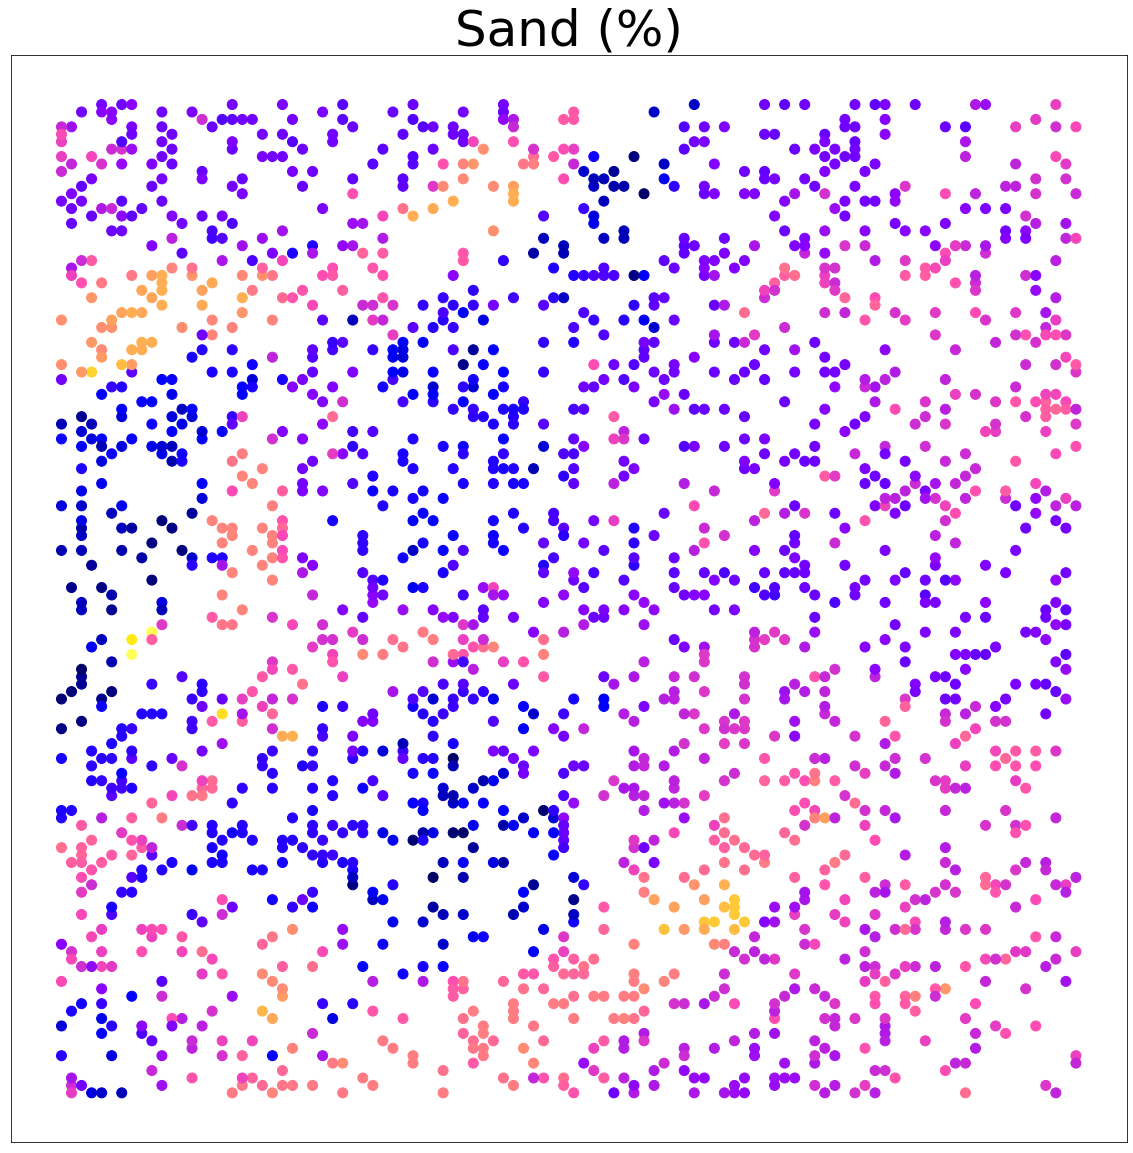

In [383]:
#Make a scatter plot of the data
plt.figure(figsize=(20,20))
plt.scatter(ix,np.max(iy)-iy,c=data_points,s=100,vmin=vmin,vmax=vmax,cmap='gnuplot2')
plt.xticks([])
plt.yticks([])
plt.title('Sand (%)',fontsize=50)
plt.show()

# How can we reproduce the original "true" map with the point data?

This is the concept of spatial prediction/spatial interpolation.

* One way to do it is to correlate the data to other predictors (regression/classification)
* Another way is to use the distance between the points to construct methods to interpolate between the points

We covered the first one in the regression/classification module. We will be focusing primarily on the second for this module. 

# Let's tidy things up a bit now

In [342]:
import pandas
sitedata = pandas.DataFrame(data={'sand':data_points,'y':y_points,'x':x_points})

In [343]:
print(sitedata)

           sand             y             x
0     21.392111 -21900.144329  36302.721219
1      9.617270   1849.855671  21802.721219
2     27.717583 -13650.144329  17802.721219
3      9.284313   1599.855671  27302.721219
4     22.187553   3599.855671  41552.721219
5      9.639905    599.855671  18552.721219
6      9.707045    599.855671  19802.721219
7     23.097342  -3400.144329  33552.721219
8     14.841619   6599.855671  20802.721219
9     29.591677 -22150.144329  24052.721219
10    12.956101  -1150.144329  25802.721219
11    29.842260 -18900.144329  30302.721219
12    17.393673   2099.855671  33302.721219
13    21.284056 -20650.144329  33302.721219
14    17.166027   9599.855671  35302.721219
15    22.753376 -21900.144329  17302.721219
16    27.464930 -11650.144329  34552.721219
17    26.864180   5849.855671  17802.721219
18    17.681429  -2400.144329  40802.721219
19    12.877913 -14400.144329  24052.721219
20    24.174498 -22150.144329  17302.721219
21    18.622993  -5400.144329  3

# Let's import that now into R

In [358]:
%%R -i sitedata
print(sitedata)

          sand            y        x
0    21.392111 -21900.14433 36302.72
1     9.617270   1849.85567 21802.72
2    27.717583 -13650.14433 17802.72
3     9.284313   1599.85567 27302.72
4    22.187553   3599.85567 41552.72
5     9.639905    599.85567 18552.72
6     9.707045    599.85567 19802.72
7    23.097342  -3400.14433 33552.72
8    14.841619   6599.85567 20802.72
9    29.591677 -22150.14433 24052.72
10   12.956101  -1150.14433 25802.72
11   29.842260 -18900.14433 30302.72
12   17.393673   2099.85567 33302.72
13   21.284056 -20650.14433 33302.72
14   17.166027   9599.85567 35302.72
15   22.753376 -21900.14433 17302.72
16   27.464930 -11650.14433 34552.72
17   26.864180   5849.85567 17802.72
18   17.681429  -2400.14433 40802.72
19   12.877913 -14400.14433 24052.72
20   24.174498 -22150.14433 17302.72
21   18.622993  -5400.14433 32802.72
22   17.283985  10349.85567 19552.72
23   11.163606 -12400.14433 27052.72
24   24.926146 -15650.14433 36552.72
25   27.800446 -18650.14433 29052.72
2

In [359]:
%%R
# Let's show some example using gstat
library(sp)

In [360]:
%%R
#Convert data frame to spatial data frame (i.e., coordinates)
coordinates(sitedata) = ~x+y

In [361]:
%%R
summary(sitedata)

Object of class SpatialPointsDataFrame
Coordinates:
        min      max
x  17052.72 42302.72
y -22150.14 11099.86
Is projected: NA 
proj4string : [NA]
Number of points: 2000
Data attributes:
      sand       
 Min.   : 4.495  
 1st Qu.:15.750  
 Median :19.508  
 Mean   :19.954  
 3rd Qu.:24.302  
 Max.   :42.650  


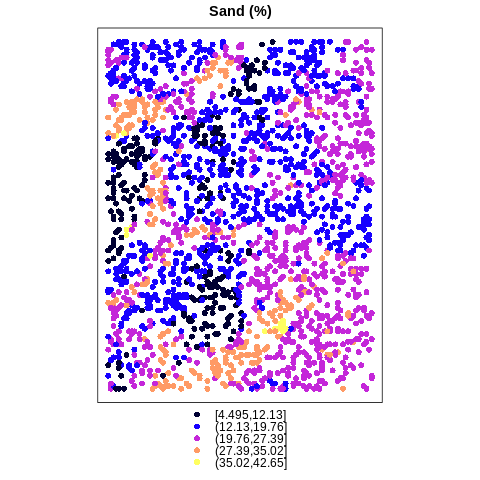

In [362]:
%%R
sp:::spplot(sitedata,"sand", main = "Sand (%)")

# We are now going to spatially interpolate these data

In [368]:
%%R
#We first need to create a grid (replicates our original grid)
sitedata.grid <- makegrid(sitedata,cellsize = 250) # cellsize in map units!

In [369]:
%%R
coordinates(sitedata.grid) = ~x1+x2 # promote to SpatialPointsDataFrame
gridded(sitedata.grid) <- TRUE # promote to SpatialPixelsDataFrame

In [370]:
%%R
summary(sand_sites.grid)

       x1              x2        
 Min.   :16950   Min.   :-22250  
 1st Qu.:23200   1st Qu.:-14000  
 Median :29575   Median : -5625  
 Mean   :29575   Mean   : -5625  
 3rd Qu.:35950   3rd Qu.:  2750  
 Max.   :42200   Max.   : 11000  


# First approach: Inverse distance weighting

In [371]:
%%R
library(gstat)
sand.idw = gstat:::idw(sand~1,sitedata,sitedata.grid,nmax=10)

[inverse distance weighted interpolation]


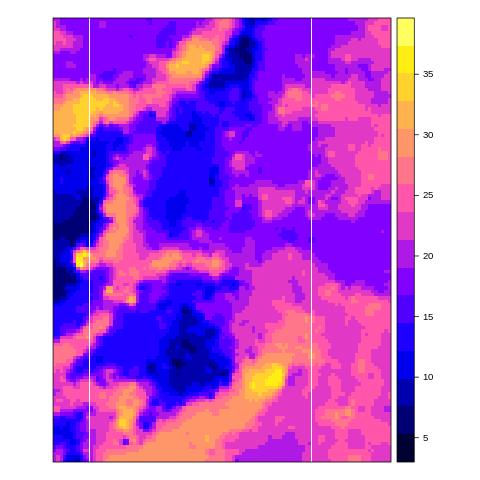

In [374]:
%%R
#Plot the new map in R
spplot(sand.idw["var1.pred"])

# Second approach: Kriging

# But first we need to compute the semivariogram

Inform us about spatial covariance between points to help assemble the spatial prediction algorithm

In [40]:
%%R
sand.vgm = gstat:::variogram(sand~1,sand_sites)

In [41]:
%%R
print(sand.vgm)

      np       dist     gamma dir.hor dir.ver   id
1   1560   637.8352  9.538798       0       0 var1
2   4575  1457.9189 20.059179       0       0 var1
3   6618  2351.8496 29.899633       0       0 var1
4   9312  3243.8273 34.117911       0       0 var1
5  11986  4176.5691 39.338865       0       0 var1
6  13321  5122.1099 40.725977       0       0 var1
7  14591  6034.5772 41.508537       0       0 var1
8  16846  6955.3233 42.852397       0       0 var1
9  18083  7892.9706 42.859356       0       0 var1
10 18517  8824.7917 43.958862       0       0 var1
11 19817  9742.9416 43.751968       0       0 var1
12 19889 10669.7217 42.567859       0       0 var1
13 20615 11593.8245 41.209633       0       0 var1
14 20877 12519.3911 40.212596       0       0 var1
15 21691 13446.7745 40.153899       0       0 var1


In [44]:
%%R
sand.fit = fit.variogram(sand.vgm, model = vgm(0, "Exp", 4000, 0))

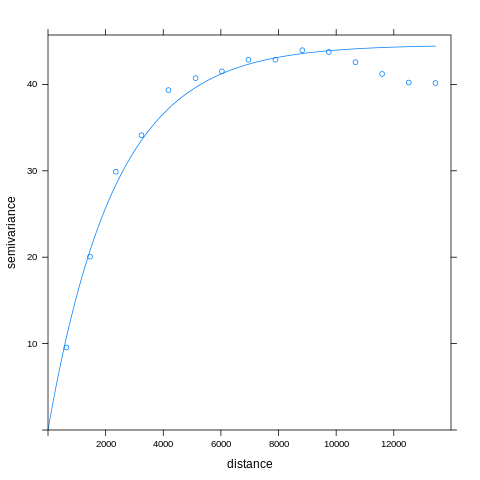

In [45]:
%%R
plot(sand.vgm,sand.fit)

# Now, we can use Kriging

In [386]:
%%R
sand.kriged = gstat:::krige(sand~1,sitedata,sitedata.grid,model=sand.fit,nmax=10)

[using ordinary kriging]


In [387]:
%%R
summary(sand.kriged)

Object of class SpatialPixelsDataFrame
Coordinates:
      min   max
x1  16825 42325
x2 -22375 11125
Is projected: NA 
proj4string : [NA]
Number of points: 13668
Grid attributes:
   cellcentre.offset cellsize cells.dim
x1             16950      250       102
x2            -22250      250       134
Data attributes:
   var1.pred         var1.var     
 Min.   : 4.926   Min.   : 2.588  
 1st Qu.:16.399   1st Qu.: 4.703  
 Median :20.055   Median : 6.755  
 Mean   :19.936   Mean   : 6.977  
 3rd Qu.:23.861   3rd Qu.: 8.796  
 Max.   :39.270   Max.   :19.819  


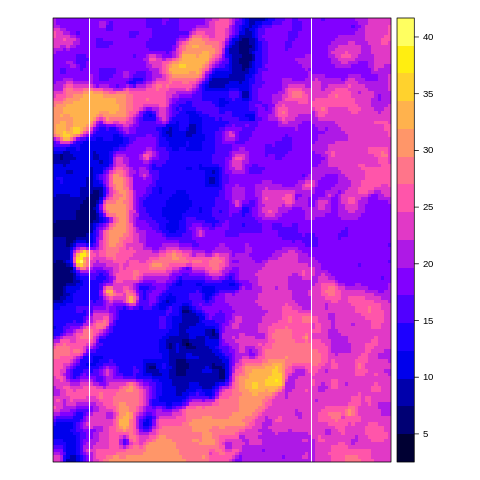

In [389]:
%%R
#Prediction
spplot(sand.kriged["var1.pred"])

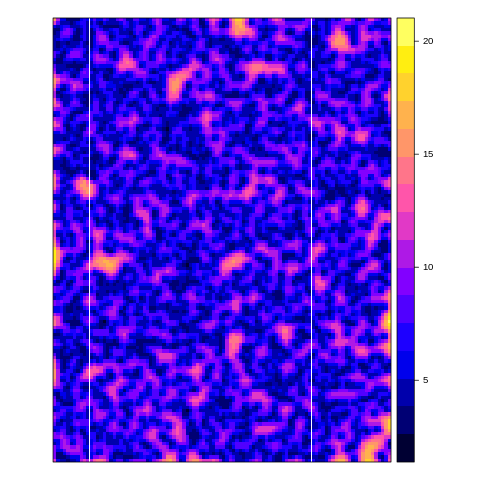

In [390]:
%%R 
#Kriging brings along uncertainty estimates as well (variance in prediction)
spplot(sand.kriged["var1.var"])

**There are lots of forms of Kriging. We will cover a few, but it will not be exhaustive.**

# Third approach: Conditional simulation (my favorite)

In [397]:
%%R
sand.condsim = gstat:::krige(sand~1,sitedata,
                             sitedata.grid, model = sand.fit,
                             nmax = 10, nsim = 20)

drawing 20 GLS realisations of beta...
[using conditional Gaussian simulation]


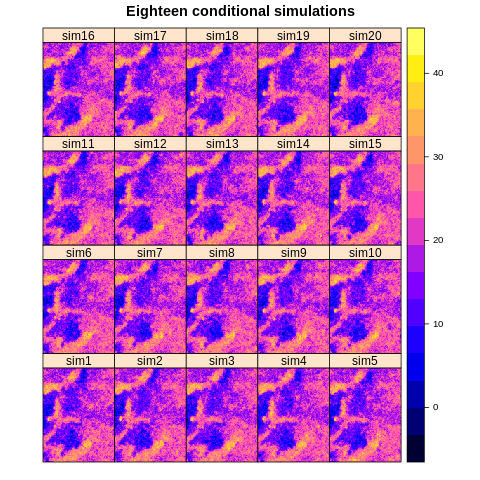

In [398]:
%%R
spplot(sand.condsim, main = "Eighteen conditional simulations")

Conditional simulations effectively make realizations that conserve the spatial properties of the system while fixing the observations that we have. 

# Plan for the next few lectures

* Introduction to Geostatistics: Theoretical background
* Semivariogram
* Most forms of Kriging
* Unconditional and conditional simulations